https://data.cityofnewyork.us/Environment/New-York-City-s-Flood-Vulnerability-Index/mrjc-v9pm/about_data

In [15]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt

from matplotlib.colors import ListedColormap, BoundaryNorm


In [10]:
# Read the shapefile
df = pd.read_csv("New_York_City_s_Flood_Vulnerability_Index_20240930.csv")

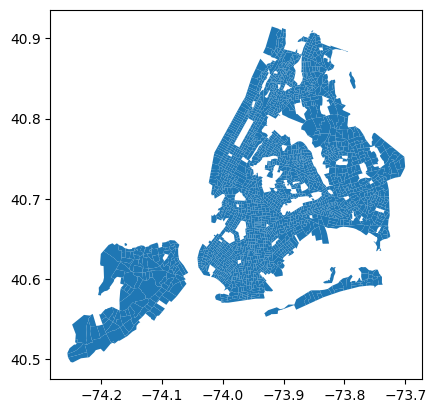

In [4]:
# Read the shapefile
gdf = gpd.read_file("/Users/bricenfisher/Downloads/New York City's Flood Vulnerability Index_20240930/geo_export_d5f0fd6a-fb11-4302-8722-c77598d0deab.shp")

# Plot the shapefile
gdf.plot()

# Show the plot
plt.show()

In [6]:
print(gdf.head(2))

         geoid fshri ss_cur ss_50s ss_80s tid_20s tid_50s tid_80s  \
0  36081036300     5    NaN    NaN    NaN     NaN     NaN     NaN   
1  36047058000     5    NaN    NaN      2     NaN     NaN     NaN   

                                            geometry  
0  POLYGON ((-73.87135 40.76233, -73.86826 40.761...  
1  POLYGON ((-73.95776 40.60099, -73.95683 40.601...  


In [12]:
gdf['ss_cur'] = gdf['ss_cur'].fillna(0)
print(gdf.head(2))

         geoid fshri ss_cur ss_50s ss_80s tid_20s tid_50s tid_80s  \
0  36081036300     5      0    NaN    NaN     NaN     NaN     NaN   
1  36047058000     5      0    NaN      2     NaN     NaN     NaN   

                                            geometry  
0  POLYGON ((-73.87135 40.76233, -73.86826 40.761...  
1  POLYGON ((-73.95776 40.60099, -73.95683 40.601...  


In [20]:
# Define your custom color list (6 colors)
colors = ['#ffffff', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850']  # Customize these colors

# Create a custom colormap
cmap = ListedColormap(colors)

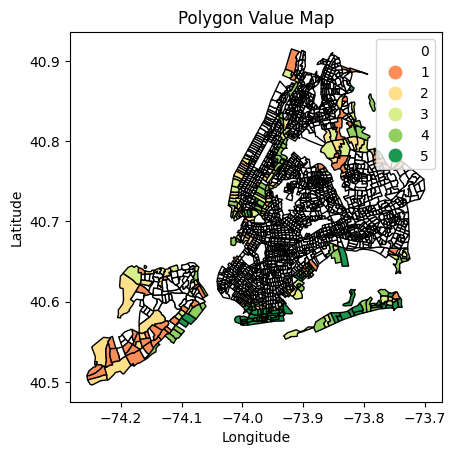

In [21]:
# Plot the polygons, colored by a specific column (replace 'value_column' with your actual column name)
gdf.plot(column='ss_cur', legend=True, cmap=cmap, edgecolor='black')

# Customize and show the plot
#plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=plt.gca(), boundaries=bounds, ticks=bounds[:-1])
plt.title('Polygon Value Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Let's get the subway MTA data

In [43]:
csvFile = pd.read_csv('/Users/bricenfisher/Documents/GitHub/NYC-MTA-Project/MTA_Subway_Entrances_and_Exits__2024_20240930.csv')
print(csvFile.head(1))

points = csvFile['entrance_georeference']

  Division    Line Borough                 Stop Name  Complex ID  \
0      BMT  4th Av       B  Atlantic Av-Barclays Ctr         617   

   Constituent Station Name  Station ID GTFS Stop ID     Daytime Routes  \
0  Atlantic Av-Barclays Ctr          27          R31  2 3 4 5 B D N Q R   

  Entrance Type Entry Allowed Exit Allowed  Entrance Latitude  \
0         Stair           YES          YES          40.683905   

   Entrance Longitude         entrance_georeference  
0          -73.978879  POINT (-73.978879 40.683905)  


In [47]:
print(points)

0         POINT (-73.978879 40.683905)
1         POINT (-73.978487 40.683805)
2         POINT (-73.978412 40.683928)
3       POINT (-73.9834296 40.6771544)
4       POINT (-73.9833364 40.6772958)
                     ...              
2115      POINT (-73.986958 40.597889)
2116      POINT (-73.983791 40.588305)
2117      POINT (-73.983735 40.588022)
2118    POINT (-73.9835485 40.5883299)
2119    POINT (-73.9834982 40.5880448)
Name: entrance_georeference, Length: 2120, dtype: object


0         POINT (-73.978879 40.683905)
1         POINT (-73.978487 40.683805)
2         POINT (-73.978412 40.683928)
3       POINT (-73.9834296 40.6771544)
4       POINT (-73.9833364 40.6772958)
                     ...              
2115      POINT (-73.986958 40.597889)
2116      POINT (-73.983791 40.588305)
2117      POINT (-73.983735 40.588022)
2118    POINT (-73.9835485 40.5883299)
2119    POINT (-73.9834982 40.5880448)
Name: entrance_georeference, Length: 2120, dtype: object


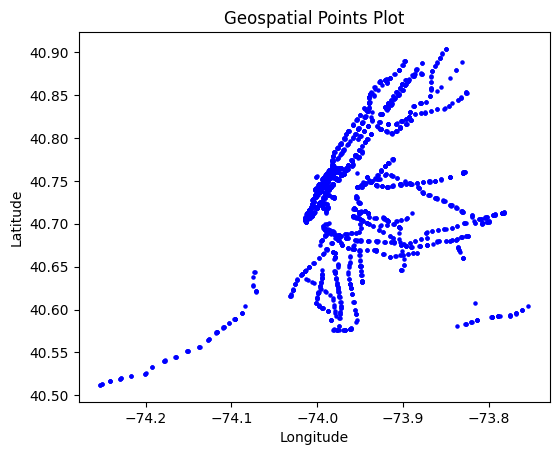

In [48]:
print(points)

# Extract longitude and latitude from POINT strings
coords = [Point(float(p.split()[1][1:]), float(p.split()[2][:-1])) for p in points]

# Create a GeoDataFrame
gdf_subways = gpd.GeoDataFrame(geometry=coords)

# Plot the points
gdf_subways.plot(marker='o', color='blue', markersize=5)

# Add titles and labels
plt.title("Geospatial Points Plot")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

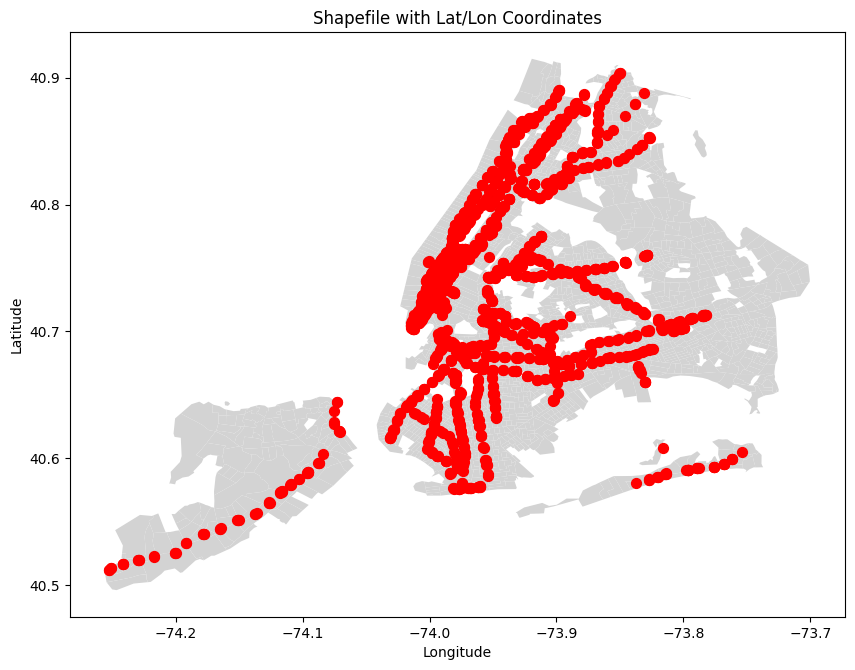

In [49]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Step 1: Load the shapefile
gdf = gpd.read_file(("/Users/bricenfisher/Downloads/New York City's Flood Vulnerability Index_20240930/geo_export_d5f0fd6a-fb11-4302-8722-c77598d0deab.shp"))

# Step 4: Plot the shapefile and points together
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the shapefile
gdf.plot(ax=ax, color='lightgray')

# Plot the lat/lon points
gdf_subways.plot(ax=ax, marker='o', color='red', markersize=50)

# Customize plot
plt.title("Shapefile with Lat/Lon Coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()